In [ ]:
"""c
import numpy as np

# Read image from file
img = plt.imread('view1.png')

# Print the NumPy array of the image
print("NumPy array of the image is: ")
print(img)

# Display the image
plt.imshow(img)
plt.show()
"""

'c\nimport numpy as np\n\n# Read image from file\nimg = plt.imread(\'view1.png\')\n\n# Print the NumPy array of the image\nprint("NumPy array of the image is: ")\nprint(img)\n\n# Display the image\nplt.imshow(img)\nplt.show()\n'

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

"""
view1gray1 = cv2.imread('view1.png', cv2.IMREAD_GRAYSCALE)
view1color1 = cv2.imread('view1.png', cv2.IMREAD_COLOR)

view2gray1 = cv2.imread('view2.png', cv2.IMREAD_GRAYSCALE)
view2color1 = cv2.imread('view2.png', cv2.IMREAD_COLOR)

disp_ground = cv2.imread('disp1.png', cv2.IMREAD_UNCHANGED)

"""






"\nview1gray1 = cv2.imread('view1.png', cv2.IMREAD_GRAYSCALE)\nview1color1 = cv2.imread('view1.png', cv2.IMREAD_COLOR)\n\nview2gray1 = cv2.imread('view2.png', cv2.IMREAD_GRAYSCALE)\nview2color1 = cv2.imread('view2.png', cv2.IMREAD_COLOR)\n\ndisp_ground = cv2.imread('disp1.png', cv2.IMREAD_UNCHANGED)\n\n"

In [ ]:
import math
"""block_size = 13
view1gray = np.pad(view1gray1, ((int((block_size-1)/2), int((block_size-1)/2)), (int((block_size-1)/2), int((block_size-1)/2))), mode='edge')
view2gray = np.pad(view2gray1, ((int((block_size-1)/2), int((block_size-1)/2)), (int((block_size-1)/2), int((block_size-1)/2))), mode='edge')
view1color = np.pad(view1color1, ((int((block_size-1)/2), int((block_size-1)/2)), (int((block_size-1)/2), int((block_size-1)/2)),(0,0)), mode='edge')
view2color = np.pad(view2color1, ((int((block_size-1)/2), int((block_size-1)/2)), (int((block_size-1)/2), int((block_size-1)/2)),(0,0)), mode='edge')
"""#v = np.pad(view1gray, (((block_size-1)/2, (block_size-1)/2), ((block_size-1)/2, (block_size-1)/2)), mode='edge')

In [ ]:
"""lol= view1gray1.shape
h=lol[0]
w=lol[1]
lol= view1gray.shape
h1=lol[0]
w1=lol[1]"""

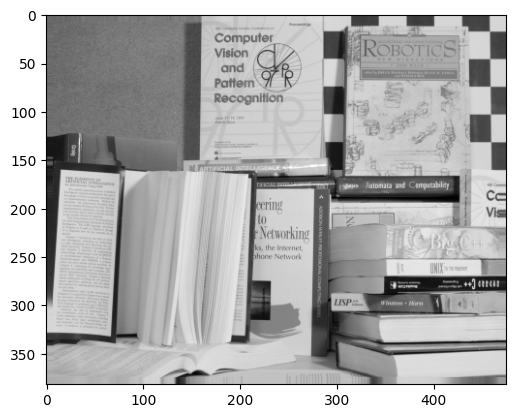

In [ ]:
"""plt.imshow(view2gray,cmap='gray')
plt.show()"""

In [ ]:
max_disparity = 50
min_disparity = 0

In [ ]:
"""disp = np.zeros((h,w))
b = int((block_size-1)/2)
for i in range(h1-2*b):
  for j in range(w1-2*b):
    sads = []
    for k in range(min_disparity,max_disparity):
      #print(i,j)
      if j+2*b+1+k>=w1:
        break
      sads.append(np.sum(np.abs(view1color[i:i+2*b+1,j:j+2*b+1,:] - view2color[i:i+2*b+1,j+k:j+2*b+1+k,:])))
    #print(i,j)
    if sads:
      disp[i,j]=sads.index(min(sads))+ min_disparity"""

In [ ]:
h

370

In [ ]:
h1

382

In [ ]:
w

463

In [ ]:
w1

475

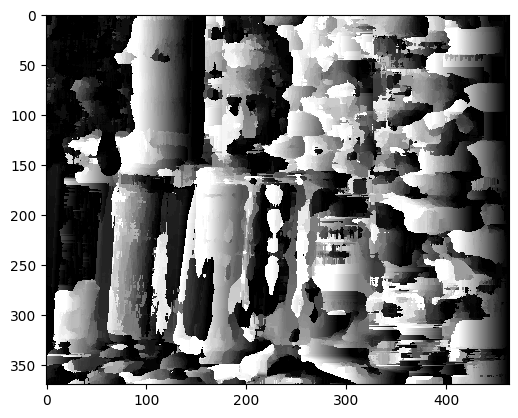

In [ ]:
"""disparity_map = (disp / max_disparity) * 255
disparity_map = disparity_map.astype(np.uint8)
plt.imshow(disparity_map ,cmap='gray')
#plt.colorbar()
plt.show()"""

In [ ]:
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

dataset_url = 'https://s3.eu-central-1.amazonaws.com/avg-kitti/data_scene_flow.zip'

dataset_path = '/dataset'

# Download the dataset
import urllib.request
urllib.request.urlretrieve(dataset_url, '/dataset.zip')

# Extract the dataset
import zipfile
with zipfile.ZipFile('/dataset.zip', 'r') as zip_ref:
    zip_ref.extractall(dataset_path)


In [ ]:
#!rm -r dataset

In [ ]:
import torchvision.transforms as transforms
from torchvision.datasets import Kitti2015Stereo

dataset_root = '/dataset'

# Create the training dataset
train_dataset = Kitti2015Stereo(root=dataset_root, split='train')

# Create the test dataset
test_dataset = Kitti2015Stereo(root=dataset_root, split='test')



In [ ]:
data_point = train_dataset[0]

In [ ]:
print(train_dataset)

Dataset Kitti2015Stereo
    Number of datapoints: 400
    Root location: /dataset


In [ ]:
data_point

(<PIL.PngImagePlugin.PngImageFile image mode=RGB size=1242x375 at 0x7F3F91F51EA0>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1242x375 at 0x7F3F91F52050>,
 array([[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]]),
 None)

In [ ]:
xxx=data_point[2]

In [ ]:
sizee = xxx.shape


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define your autoencoder model


class StereoAutoencoder(nn.Module):
    def __init__(self):
        super(StereoAutoencoder, self).__init__()
        """self.conv1 = nn.Conv2d(6, 64, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        nn.ConvTranspose2d(64, 32, kernel_size=2, stride=2),
        """
        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(6, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(True),
            #nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(True),
           # nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(True),
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(True),
            nn.ConvTranspose2d(32, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(True),
            nn.ConvTranspose2d(16, 1, kernel_size=3, stride=1, padding=1),
            #nn.ReLU(True),
            #nn.ConvTranspose2d(64, 32, kernel_size=2, stride=2),

            #nn.Sigmoid()
        )

    def forward(self, x1,x2):
        x = torch.cat((x1, x2), dim=0)
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


# Define loss function and optimizer
criterion = nn.MSELoss()
autoencoder = StereoAutoencoder()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)


In [ ]:
testi.shape

torch.Size([3, 375, 1242])

In [ ]:
trra = transforms.PILToTensor()
testi =trra(data_point[0])
trra2 =transforms.ConvertImageDtype(torch.float)
x=autoencoder(trra2(testi),trra2(testi))

In [ ]:
x.shape

torch.Size([1, 375, 1242])

In [ ]:
criterion(x,torch.from_numpy(data_point[2])).item()

258.86165314774104

In [ ]:
for data in train_dataset:
    x1 = trra2(trra(data[0]))
    x2 = trra2(trra(data[1]))
    break

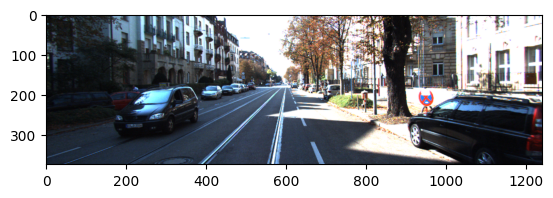

In [ ]:
plt.imshow((x1.permute(1, 2, 0).detach().numpy()).squeeze() ,cmap='gray')
#plt.colorbar()
plt.show()

In [ ]:
x.shape

torch.Size([1, 375, 1242])

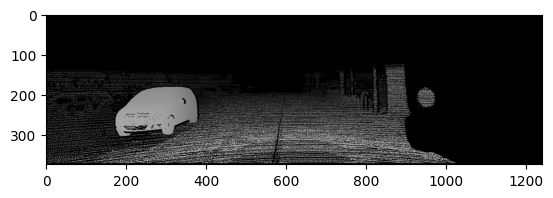

In [ ]:
plt.imshow((data_point[2]).squeeze() ,cmap='gray')
#plt.colorbar()
plt.show()

In [ ]:
autoencoder=autoencoder.float()
autoencoder.train()
# Training loop
num_epochs = 50
for epoch in range(num_epochs):
    #i=0
    running_loss = 0.0
    for data in train_dataset:
        #print(i)
        #i=i+1
        if data[2].shape != sizee:
          continue
        x1 = trra2(trra(data[0]))
        x2 = trra2(trra(data[1]))

        #print(X1)
#plt.colorbar()
       # plt.show()
       # raise KeyboardInterrupt("Code execution stopped by user")
        outputs = autoencoder(x1,x2)
        loss = criterion(outputs.float(), torch.from_numpy(data[2]).float())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    epoch_loss = running_loss / len(train_dataset)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")
    # Validation loop
    """with torch.no_grad():
        val_loss = 0
        for data in val_dataset:
            x1 = trra2(trra(data[0]))
            x2 = trra2(trra(data[1]))
            outputs = autoencoder(x1,x2)
            val_loss += criterion(outputs, torch.from_numpy(data[2])).item()

        avg_val_loss = val_loss / len(val_dataset)
        print(f"Epoch {epoch+1}/{num_epochs}, Validation Loss: {avg_val_loss:.4f}")
"""
# Testing loop
"""with torch.no_grad():
    test_loss = 0
    for data in test_dataset:
        x1 = trra2(trra(data[0]))
        x2 = trra2(trra(data[1]))
        #inputs, _ = data  # Assuming the dataset does not have labels
        outputs = autoencoder(x1,x2)
        test_loss += criterion(outputs, data[2]).item()

    avg_test_loss = test_loss / len(test_dataset)
    print(f"Test Loss: {avg_test_loss:.4f}")
"""

Epoch [1/50], Loss: 96.2396
Epoch [2/50], Loss: 93.6672
Epoch [3/50], Loss: 90.6205
Epoch [4/50], Loss: 88.7019
Epoch [5/50], Loss: 88.8468
Epoch [6/50], Loss: 88.8983
Epoch [7/50], Loss: 88.3206
Epoch [8/50], Loss: 88.7853
Epoch [9/50], Loss: 87.8658
Epoch [10/50], Loss: 87.3317
Epoch [11/50], Loss: 87.4227
Epoch [12/50], Loss: 87.2771
Epoch [13/50], Loss: 86.9006
Epoch [14/50], Loss: 87.1264
Epoch [15/50], Loss: 86.6305
Epoch [16/50], Loss: 86.6098
Epoch [17/50], Loss: 86.3792
Epoch [18/50], Loss: 86.0108


KeyboardInterrupt: ignored

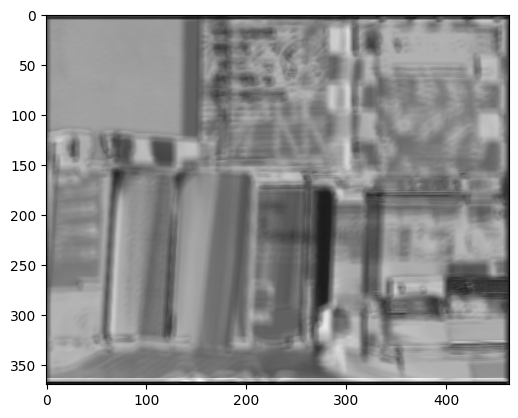

In [ ]:
import numpy as np
from PIL import Image
left_img = Image.open('view1.png')
right_img = Image.open('view2.png')
x1 = trra2(trra(left_img))
x2 = trra2(trra(right_img))
outputs = autoencoder(x1,x2)
plt.imshow((outputs.detach().numpy()).squeeze() ,cmap='gray')
#plt.colorbar()
plt.show()

In [ ]:
Image.fromarray((outputs.detach().numpy()).squeeze()).save('out.png')

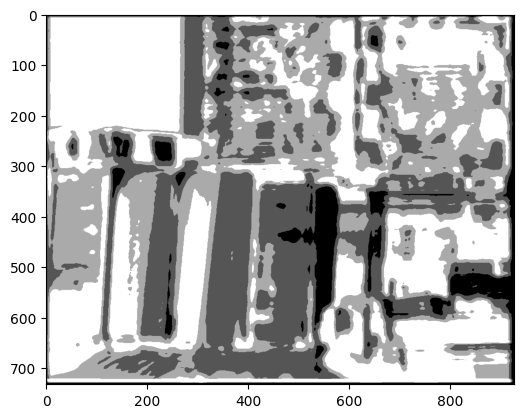

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from skimage import data, filters, exposure, io

#image = cv2.imread('out.png', 0)
image = io.imread('out.png',as_gray=True)
thresholds = filters.threshold_multiotsu(image, classes=4)

regions = np.digitize(image, bins=thresholds)
# Display the thresholded image
plt.imshow(regions ,cmap='gray')
#plt.colorbar()
plt.show()

In [ ]:
import numpy as np
from PIL import Image
def stereo_match(left_img, right_img, kernel, max_offset):

    left_img = Image.open(left_img).convert('L')
    left = np.asarray(left_img)
    right_img = Image.open(right_img).convert('L')
    right = np.asarray(right_img)
    w, h = left_img.size


    depth = np.zeros((w, h), np.uint8)
    depth.shape = h, w

    kernel_half = int(kernel / 2)
    offset_adjust = 255 / max_offset  # this is used to map depth map output to 0-255 range

    for y in range(kernel_half, h - kernel_half):


        for x in range(kernel_half, w - kernel_half):
            best_offset = 0
            prev_ssd = 65534

            for offset in range(max_offset):
                ssd = 0
                ssd_temp = 0


                for v in range(-kernel_half, kernel_half):
                    for u in range(-kernel_half, kernel_half):

                        ssd_temp = int(left[y+v, x+u]) - int(right[y+v, (x+u) - offset])
                        ssd += ssd_temp * ssd_temp


                if ssd < prev_ssd:
                    prev_ssd = ssd
                    best_offset = offset


            depth[y, x] = best_offset * offset_adjust


    Image.fromarray(depth).save('depth.png')

In [ ]:
stereo_match("view1.png", "view2.png", 10, 50)